In [41]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [42]:
# Carregar a base de dados

path = kagglehub.dataset_download("ankushpanday1/global-road-accidents-dataset")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday1/global-road-accidents-dataset/versions/1


['road_accident_dataset.csv']

In [43]:
path = '/root/.cache/kagglehub/datasets/ankushpanday1/global-road-accidents-dataset/versions/1'
df = pd.read_csv(path + '/road_accident_dataset.csv')

## Propriedades dos dados:

In [44]:
df.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

In [46]:
df.isnull().sum()

,0
Country,0
Year,0
Month,0
Day of Week,0
Time of Day,0
Urban/Rural,0
Road Type,0
Weather Conditions,0
Visibility Level,0
Number of Vehicles Involved,0


## Explorando os dados:

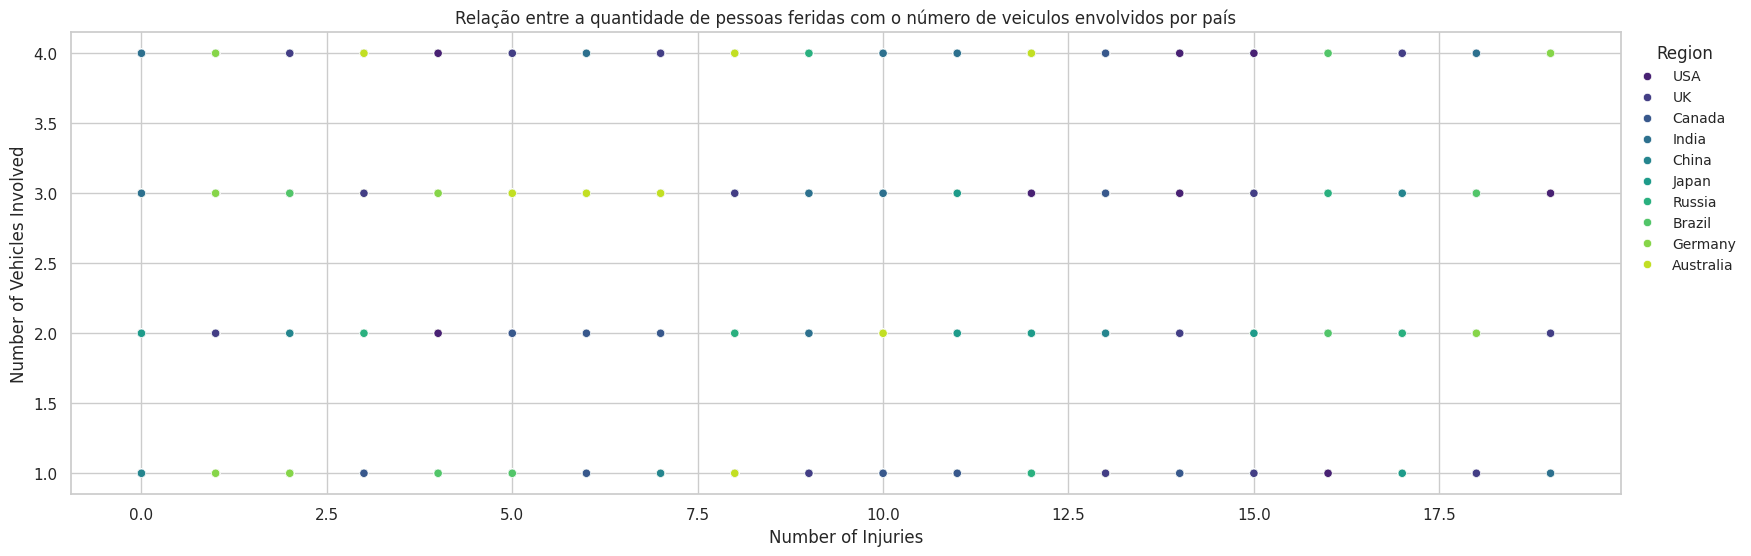

In [60]:
# Verificando a relação entre as variáveis

plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Number of Injuries', y='Number of Vehicles Involved', hue='Country', palette='viridis')
plt.title('Relação entre a quantidade de pessoas feridas com o número de veiculos envolvidos por país')
plt.xlabel('Number of Injuries')
plt.ylabel('Number of Vehicles Involved')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

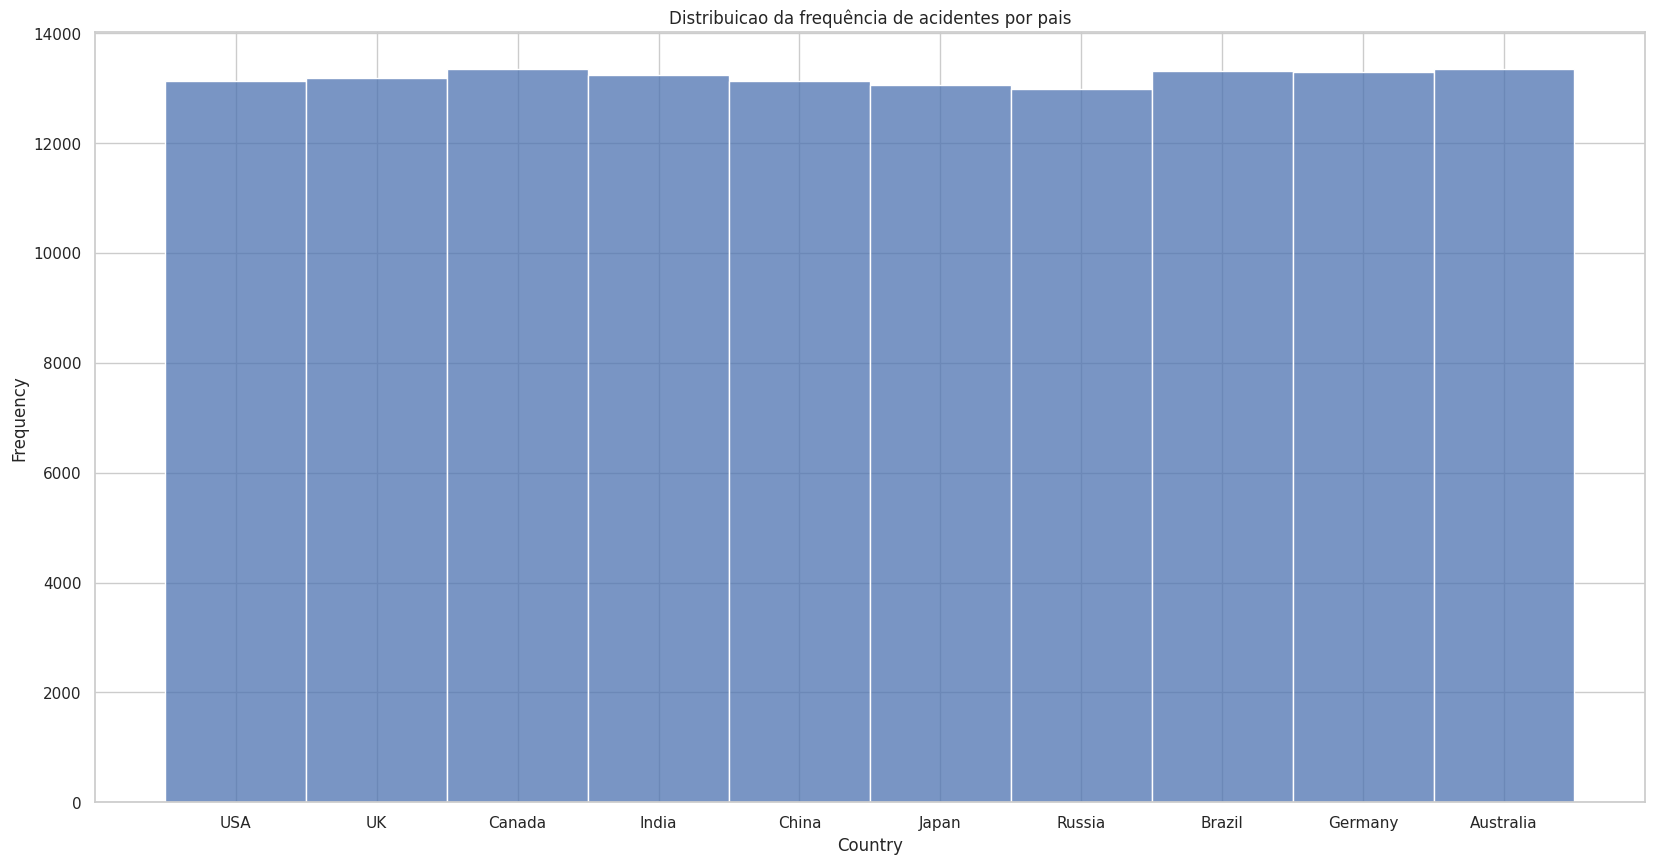

In [54]:
#Frequência de acidentes de transito por pais

plt.figure(figsize=(20, 10))
sns.histplot(df['Country'], bins=30)
plt.title('Distribuicao da frequência de acidentes por pais')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

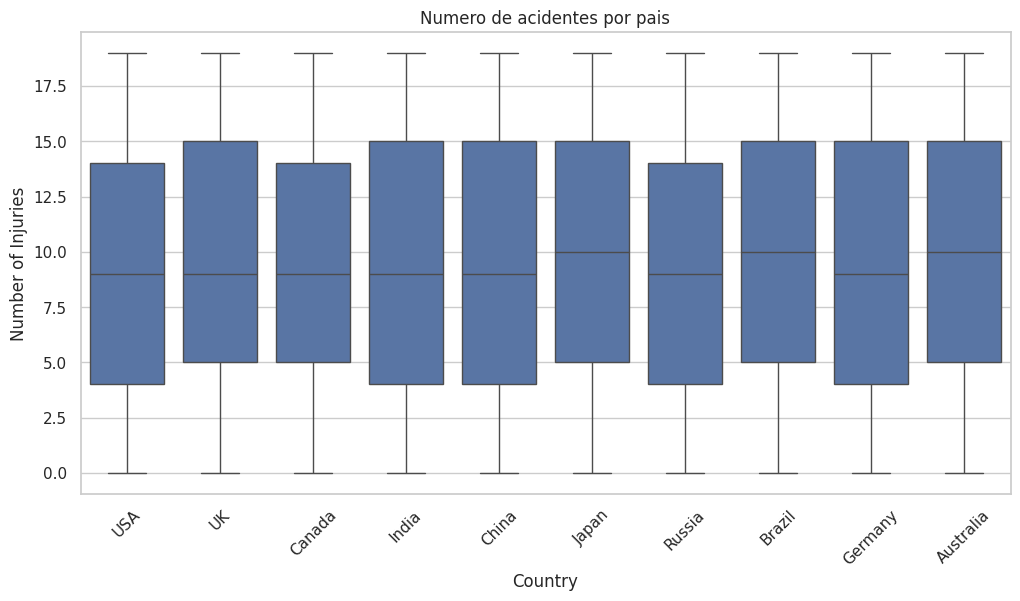

In [49]:
# Verificando a relação dos paises

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Number of Injuries', data=df)
plt.title('Quantidade de pessoas feridas por pais')
plt.xticks(rotation=45)
plt.show()

##  Relação entre acidentes e severidade:

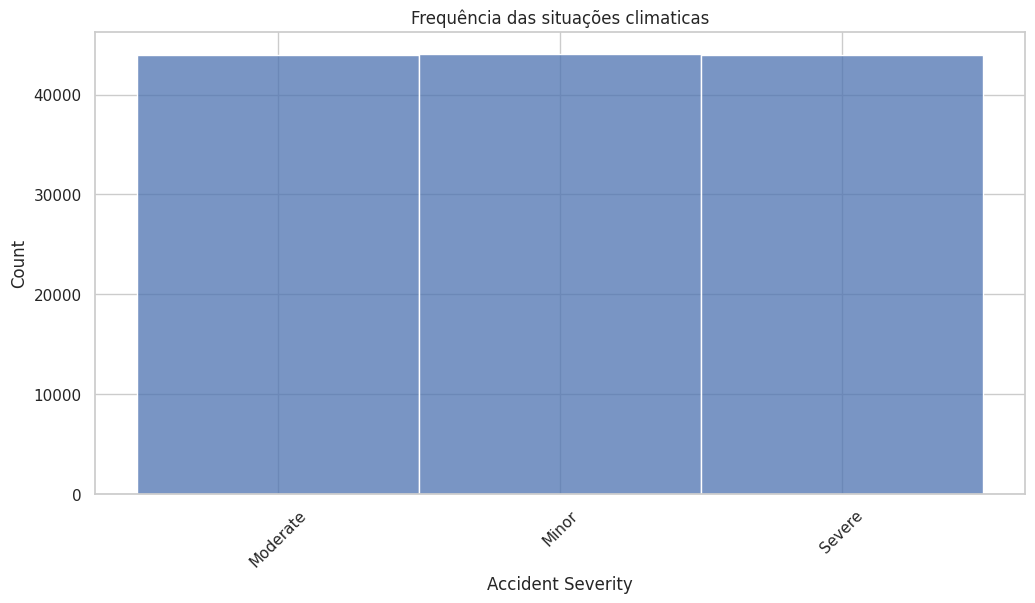

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Accident Severity', data=df)
plt.title('Frequência das situações climaticas')
plt.xticks(rotation=45)
plt.show()

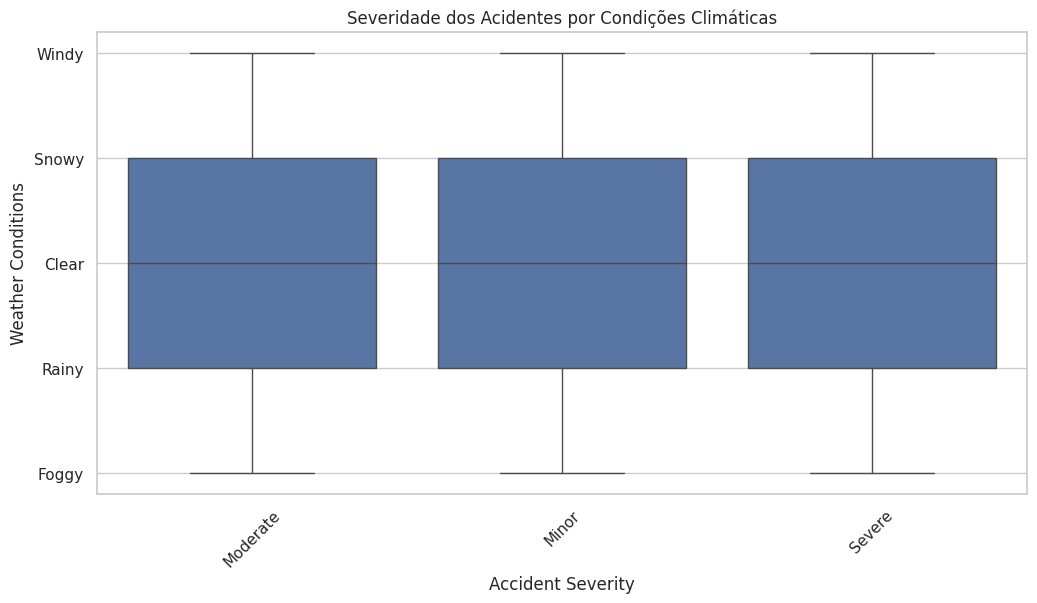

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Accident Severity', y='Weather Conditions', data=df)
plt.title('Severidade dos Acidentes por Condições Climáticas')
plt.xticks(rotation=45)
plt.show()

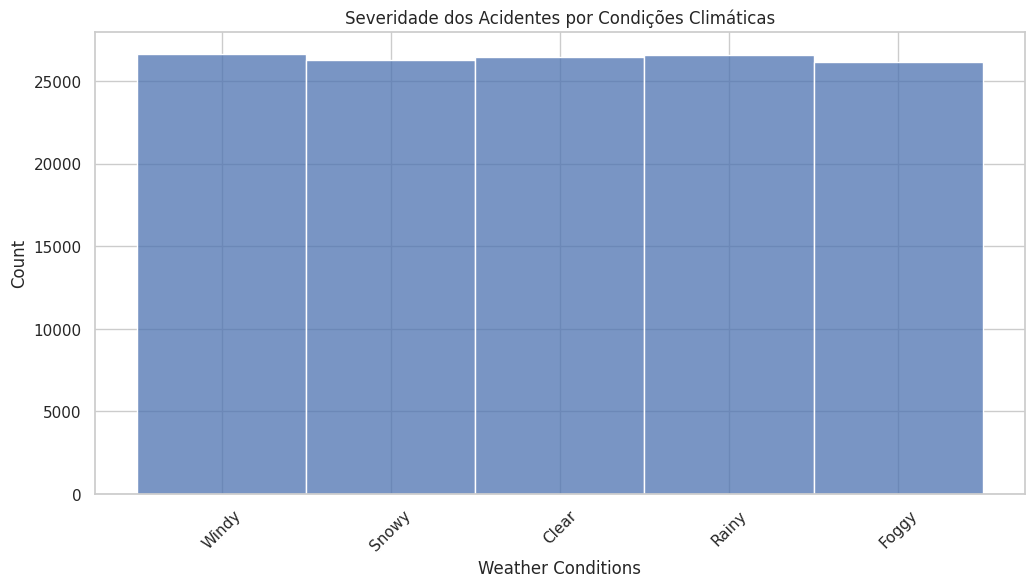

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Weather Conditions', data=df)
plt.title('Frequência das situações climaticas')
plt.xticks(rotation=45)
plt.show()

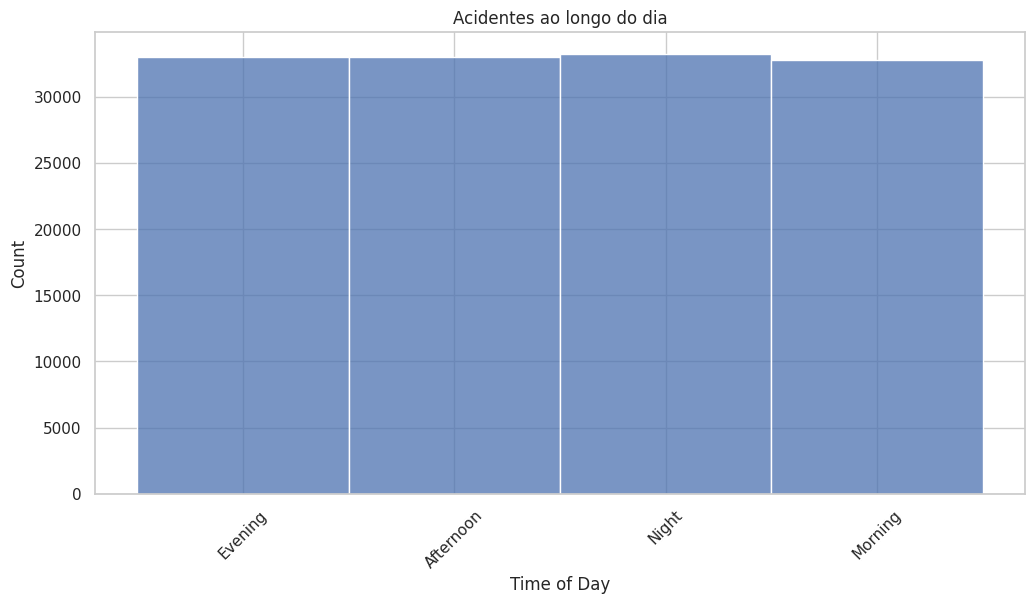

In [123]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Time of Day', data=df)
plt.title('Acidentes ao longo do dia')
plt.xticks(rotation=45)
plt.show()

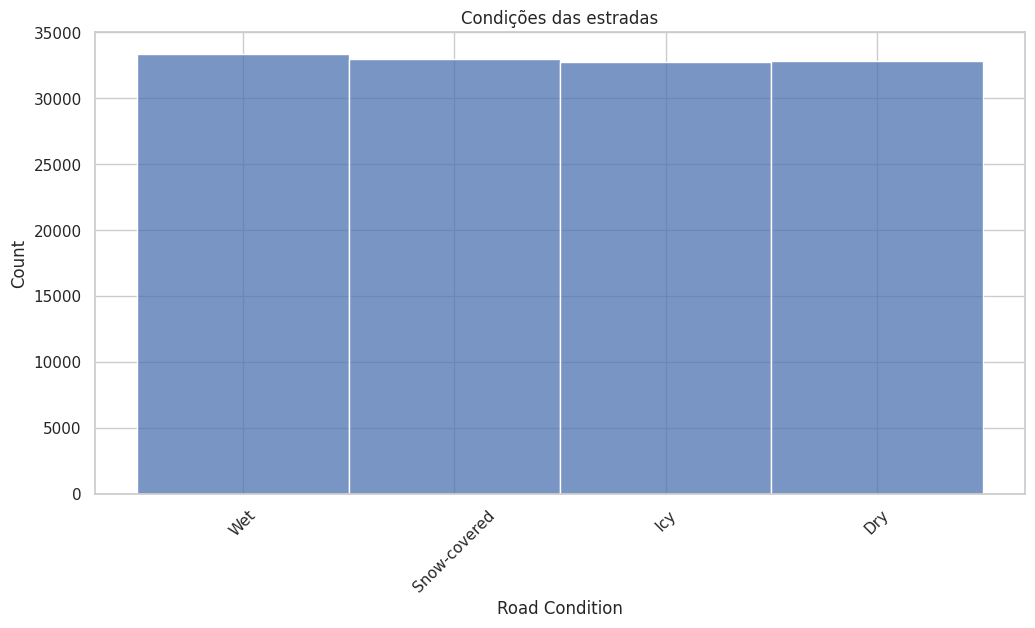

In [124]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Road Condition', data=df)
plt.title('Condições das estradas')
plt.xticks(rotation=45)
plt.show()

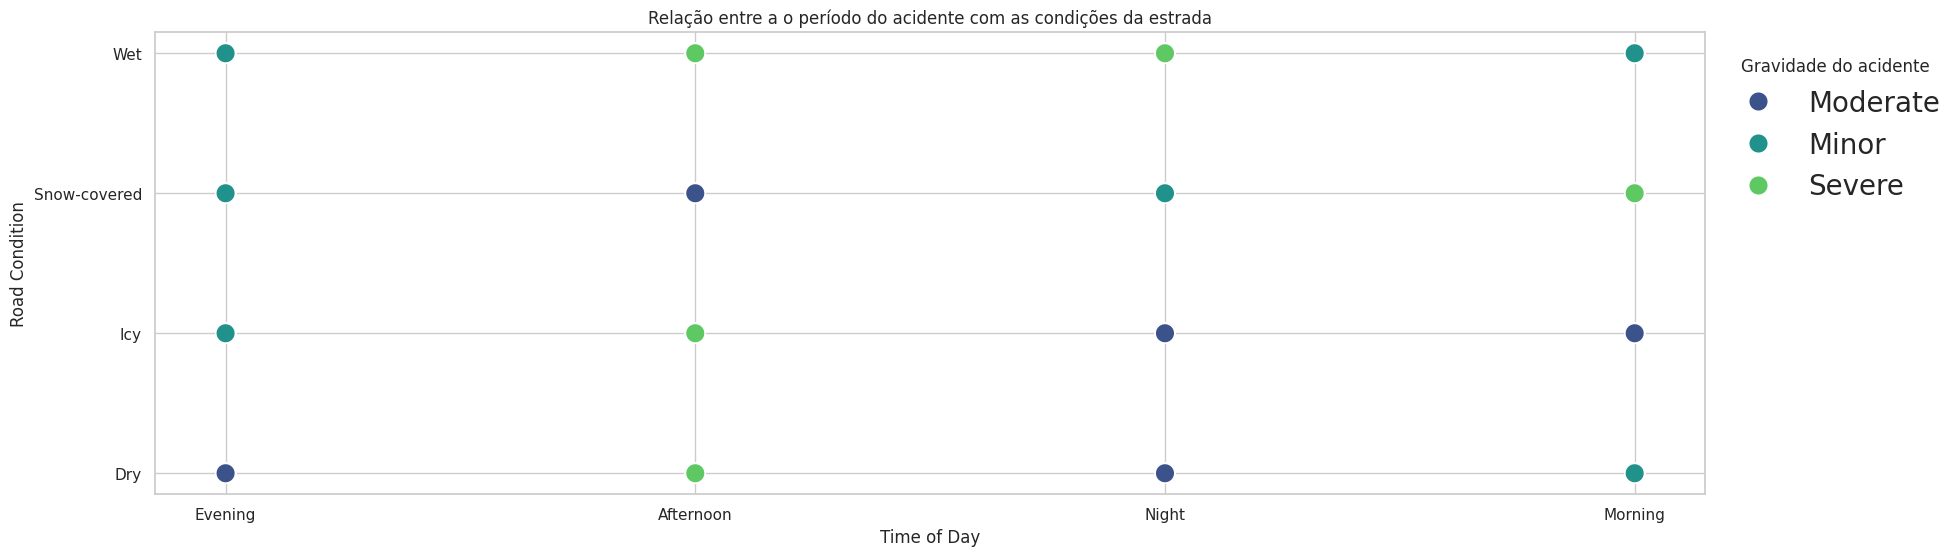

In [131]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Time of Day', y='Road Condition', hue='Accident Severity', palette='viridis', s=200)
plt.title('Relação entre a o período do acidente com as condições da estrada')
plt.xlabel('Time of Day')
plt.ylabel('Road Condition')
plt.legend(title='Gravidade do acidente', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=20)
plt.show()

## O impacto da fadiga e álcool:


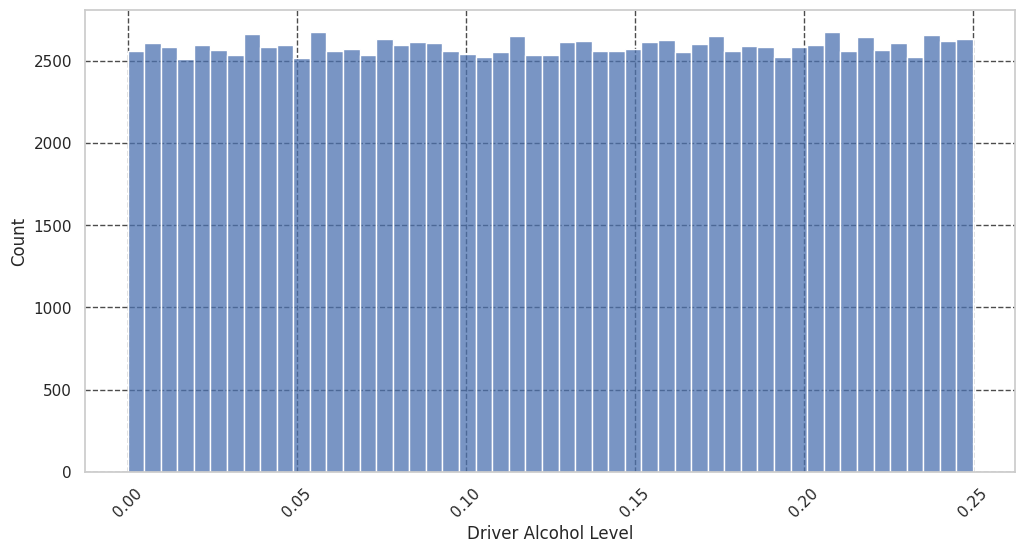

In [89]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Driver Alcohol Level', data=df)
plt.title('Frequência de álcool no sangue do motorista')
plt.grid(axis='both', linestyle='--', color='black', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

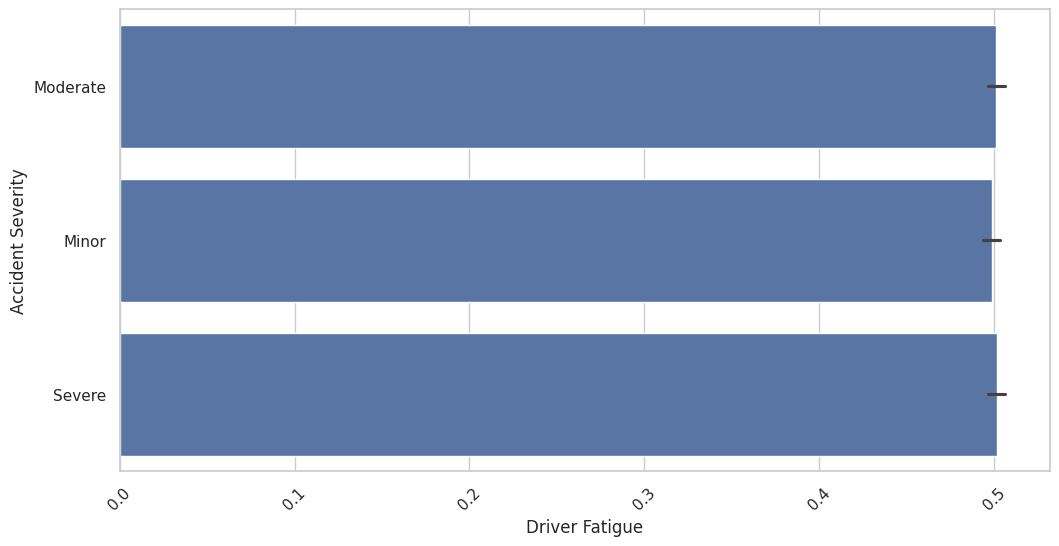

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Driver Fatigue', y='Accident Severity', data=df)
plt.title('Relação entre gravidade do acidente e a fadiga do motorista')
plt.xticks(rotation=45)
plt.show()

## Comparando área urbana com rural:

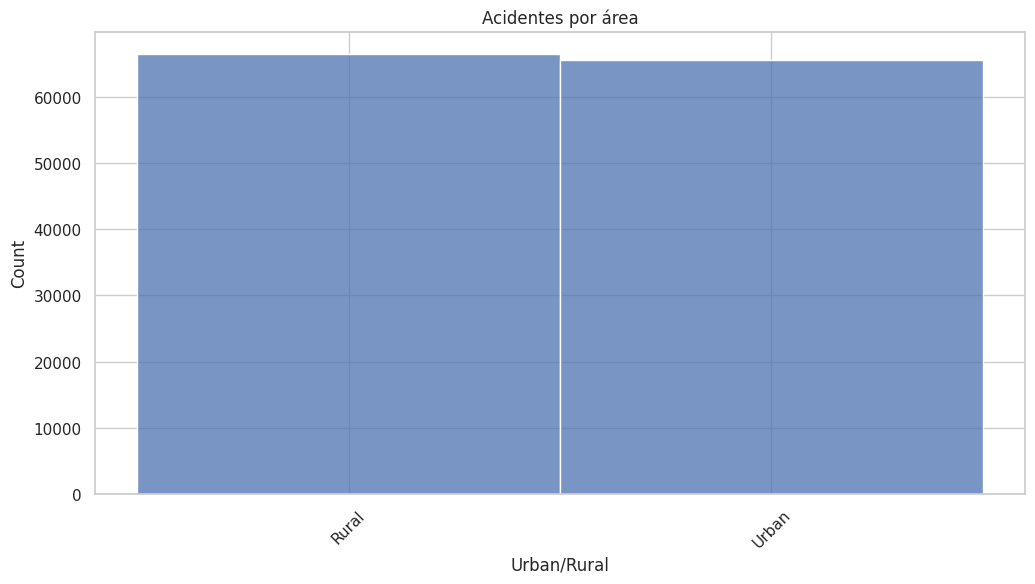

In [132]:
plt.figure(figsize=(12,6))
sns.histplot(x='Urban/Rural', data=df)
plt.title('Acidentes por área')
plt.xticks(rotation=45)
plt.show()